## K-Nearest Neighbors

• Consider the Abalone data set available at UCI ML Repository:
https://archive.ics.uci.edu/ml/index.php Links to an external site.

• You can upload this data set into your Jupyter notebook using the following code:
   url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
   df = pd.read_csv(url)
• Change the names of the columns using the following code :
   df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]

• The goal of this homework is to use K-Nearest Neighbors Regressor to predict the number of rings (df["Rings"], the target variable) using the features given. Note that one of the features is categorical, and you can choose to drop it or to encode it numerically.

• You can either use the code we created from scratch and modify it for this problem, or you can use sklearn.KNeighborsRegressor:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html Links to an external site.

• Divide the dataset into subsets for training and testing.

• Since this is a regression problem, the appropriate error functions you may use are MSE, MAE, and RMSE. Consider several different choices of the hyper-parameter K and see how the error changes with respect to K.

• Use GridSearchCV to select the optimal values of K (and maybe other hyper-parameters) and report the model performance.

In [2]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

In [3]:
# read data set

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"
df = pd.read_csv(url)
df

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# define column names

df.columns = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [5]:
# total number of data points and features

df.shape

(4176, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4176 non-null   object 
 1   Length          4176 non-null   float64
 2   Diameter        4176 non-null   float64
 3   Height          4176 non-null   float64
 4   Whole weight    4176 non-null   float64
 5   Shucked weight  4176 non-null   float64
 6   Viscera weight  4176 non-null   float64
 7   Shell weight    4176 non-null   float64
 8   Rings           4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
# data types of each variable

df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [8]:
# since 'Sex' feature is object data type, it has to be encoded to numbers
# Label encoder is used since it is a nominal categorical data

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# fit_transform is applied for the Sex feature and it is stored in the data frame

df["Sex"] = le.fit_transform(df["Sex"])

# mapping of the categorical values with numbers

le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

{'F': 0, 'I': 1, 'M': 2}


In [9]:
# Sex feature has been changed

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


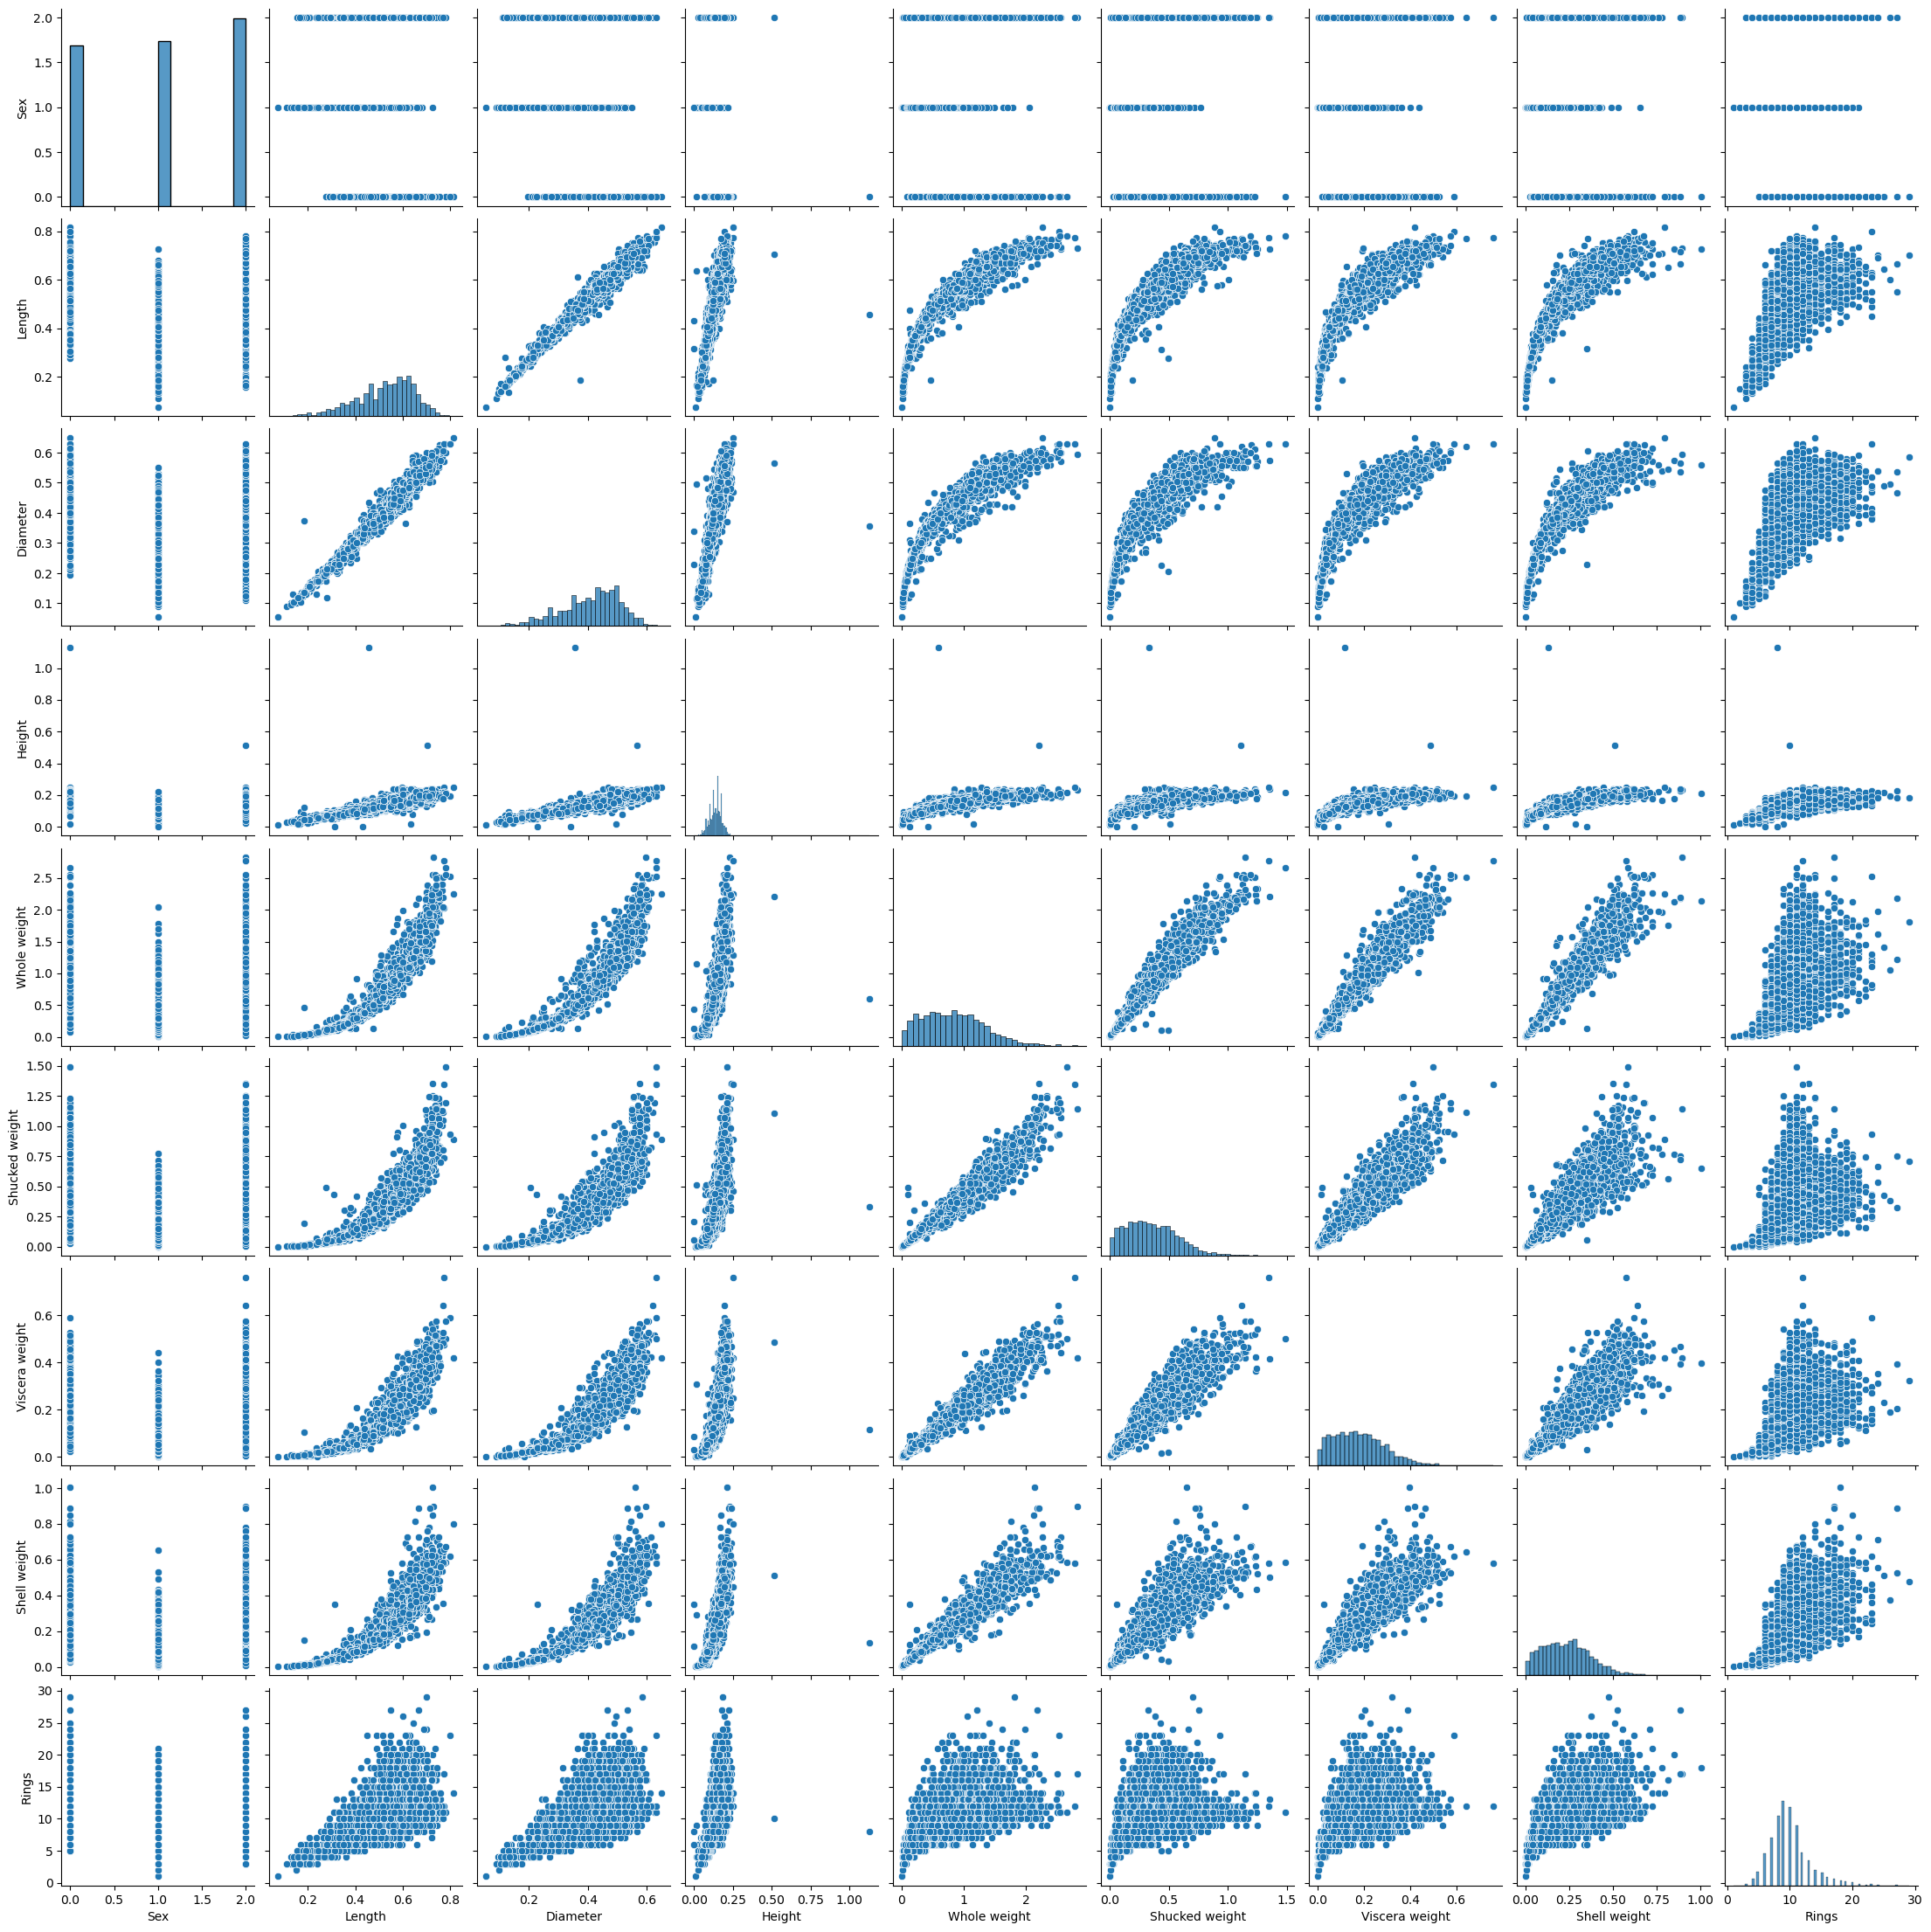

In [10]:
# relationship between each variable
sns.pairplot(df)

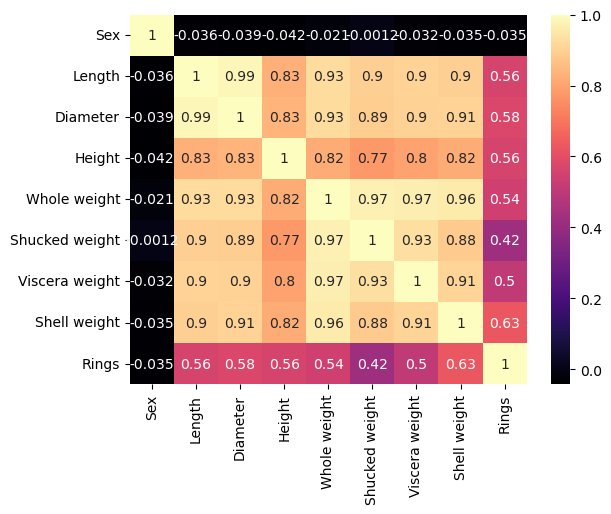

In [11]:
# find correlation to select the feature

sns.heatmap(data=df.corr(), annot=True, cmap = "magma");

In [12]:
# defining X and y variables
from sklearn.neighbors import KNeighborsRegressor

X = df.drop("Rings", axis='columns')
y = df["Rings"]

In [13]:
# splitting the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
X_train.count()

Sex               2923
Length            2923
Diameter          2923
Height            2923
Whole weight      2923
Shucked weight    2923
Viscera weight    2923
Shell weight      2923
dtype: int64

In [15]:
X_test.count()

Sex               1253
Length            1253
Diameter          1253
Height            1253
Whole weight      1253
Shucked weight    1253
Viscera weight    1253
Shell weight      1253
dtype: int64

In [16]:
# KNN Regressor algorithm is used with default parameters (weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')

model = KNeighborsRegressor(n_neighbors = 10)
model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [17]:
# Compute RMSE for training and testing datasets

from sklearn.metrics import mean_squared_error, mean_absolute_error 

mse_train = mean_squared_error(y_train, model.predict(X_train))
mse_test = mean_squared_error(y_test, model.predict(X_test))

print(f"MSE on the training data: {mse_train:.3f}")
print(f"MSE on the test data: {mse_test:.3f}\n")


MSE on the training data: 3.849
MSE on the test data: 5.280



In [18]:
# Comparing k values with training and testing mean square error

k_values = []
mse_train_values = []
mse_test_values = []
d = []

for k in range(1, 50, 2):
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)
    mse_train = round(mean_squared_error(y_train, model.predict(X_train)),3)
    mse_test = round(mean_squared_error(y_test, model.predict(X_test)),3)
    k_values.append(k)
    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)
    d.append(
        {
            'k-values': k,
            'mse_train': mse_train,
            'mse_test': mse_test
        }
    )

# dataframe of k, mse_train and mse_test

df_error = pd.DataFrame(d)


In [19]:
df_error

,k-values,mse_train,mse_test
0,1,0.000,8.237
1,3,2.658,5.846
2,5,3.257,5.397
3,7,3.562,5.320
4,9,3.732,5.336
5,11,3.908,5.269
6,13,4.009,5.276
7,15,4.100,5.258
8,17,4.172,5.258
9,19,4.228,5.236


In [82]:
# sorting with mse train values

df_error.sort_values(by = 'mse_train')

,k-values,mse_train,mse_test
0,1,0.000,8.237
1,3,2.658,5.846
2,5,3.257,5.397
3,7,3.562,5.320
4,9,3.732,5.336
5,11,3.908,5.269
6,13,4.009,5.276
7,15,4.100,5.258
8,17,4.172,5.258
9,19,4.228,5.236


In [21]:
# sorting with mse test values

df_error.sort_values(by = 'mse_test')

,k-values,mse_train,mse_test
9,19,4.228,5.236
10,21,4.277,5.254
8,17,4.172,5.258
7,15,4.100,5.258
5,11,3.908,5.269
6,13,4.009,5.276
11,23,4.329,5.285
3,7,3.562,5.320
12,25,4.375,5.329
4,9,3.732,5.336


In [22]:
# finding the k value with minimum of mse on test set

best_k = k_values[mse_test_values.index(min(mse_test_values))]
best_k

19

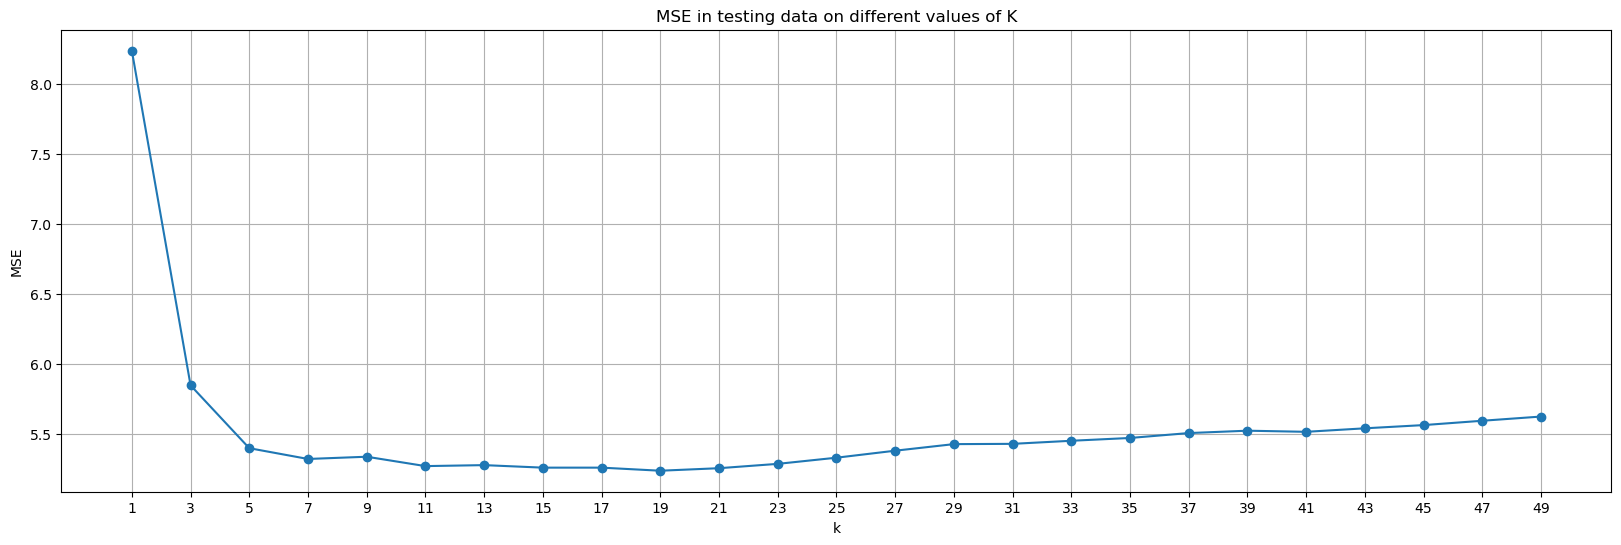

In [23]:
plt.figure(figsize = (20, 6))

plt.plot(k_values, mse_test_values, marker = "o")
plt.title("MSE in testing data on different values of K")
plt.xlabel("k")
plt.ylabel("MSE")
plt.xticks(k_values)
plt.grid();

In [105]:
# cross validation with 5 models with scoring method as megative mean sqaure error

from sklearn.model_selection import cross_val_score, GridSearchCV

cv_scores = cross_val_score(KNeighborsRegressor(n_neighbors=10), 
                            X_train, 
                            y_train, 
                            cv=5, # no shuffle, stratified for classifiers, default value 5
                            #cv=KFold(n_splits=5, shuffle=True), 
                            #cv=StratifiedKFold(n_splits=5, shuffle=True),
                            #cv=RepeatedKFold(n_splits=5, n_repeats=3),
                            scoring='neg_mean_squared_error')

cv_scores

array([-4.68251282, -5.23639316, -4.47182906, -4.1977226 , -5.19748288])

[-4.683 -5.236 -4.472 -4.198 -5.197]
Average Negative MSE: -4.757
Negative Error Standard Deviation: 0.406


[]

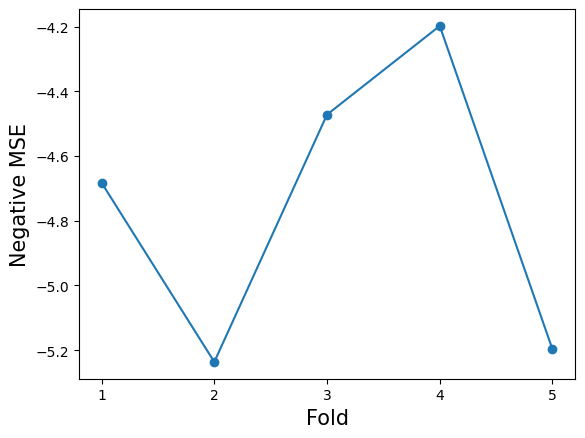

In [119]:
plt.plot(range(1, 6), cv_scores, marker='o')
plt.ylabel('Negative MSE', fontsize=15)
plt.xlabel('Fold', fontsize=15)
plt.xticks(range(1, 6))

print(np.round(cv_scores,3))
print('Average Negative MSE:', round(cv_scores.mean(),3))
print('Negative Error Standard Deviation:', round(cv_scores.std(),3));  
plt.plot()

In [25]:
# GridSearchCv for selecting best hyper parameters such as neighbours, weights and p value(distance) with scoring method as megative mean sqaure error

gs = GridSearchCV(estimator = KNeighborsRegressor(),
                  param_grid = {"n_neighbors": range(1,51),
                                "weights": ['uniform', 'distance'],
                                "p": [1,2]},
                  cv=5, scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

results = pd.DataFrame(gs.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001612,0.000164,0.003611,0.000610,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",-7.606838,-8.285470,-8.090598,-7.077055,-7.647260,-7.741444,0.421017,199
1,0.001376,0.000021,0.003207,0.000118,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",-7.606838,-8.285470,-8.090598,-7.077055,-7.647260,-7.741444,0.421017,199
2,0.001351,0.000006,0.002557,0.000078,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",-7.909402,-8.441026,-7.945299,-6.761986,-7.616438,-7.734830,0.553882,197
3,0.001332,0.000013,0.002575,0.000072,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",-7.909402,-8.441026,-7.945299,-6.761986,-7.616438,-7.734830,0.553882,197
4,0.001352,0.000032,0.003478,0.000154,2,1,uniform,"{'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}",-5.738462,-6.839744,-5.694444,-5.140839,-6.414384,-5.965574,0.595127,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.001388,0.000027,0.007776,0.000183,49,2,distance,"{'n_neighbors': 49, 'p': 2, 'weights': 'distan...",-5.028877,-5.597092,-4.664162,-4.503175,-5.206371,-4.999935,0.389760,146
196,0.001396,0.000006,0.008754,0.000155,50,1,uniform,"{'n_neighbors': 50, 'p': 1, 'weights': 'uniform'}",-5.247965,-5.888388,-4.859937,-4.722610,-5.335469,-5.210874,0.409264,188
197,0.001372,0.000011,0.008829,0.000198,50,1,distance,"{'n_neighbors': 50, 'p': 1, 'weights': 'distan...",-5.057246,-5.685368,-4.676610,-4.520956,-5.188713,-5.025779,0.409722,156
198,0.001391,0.000013,0.007802,0.000163,50,2,uniform,"{'n_neighbors': 50, 'p': 2, 'weights': 'uniform'}",-5.232354,-5.799603,-4.859556,-4.737312,-5.390265,-5.203818,0.381230,187


In [26]:
results[["param_n_neighbors", "param_weights", "param_p", "mean_test_score", "rank_test_score"]]

,param_n_neighbors,param_weights,param_p,mean_test_score,rank_test_score
0,1,uniform,1,-7.741444,199
1,1,distance,1,-7.741444,199
2,1,uniform,2,-7.734830,197
3,1,distance,2,-7.734830,197
4,2,uniform,1,-5.965574,193
...,...,...,...,...,...
195,49,distance,2,-4.999935,146
196,50,uniform,1,-5.210874,188
197,50,distance,1,-5.025779,156
198,50,uniform,2,-5.203818,187


In [27]:
# best hyper parameters and minimum negative mean square error is given

gs.best_score_

-4.658163773964914

In [28]:
gs.best_params_

{'n_neighbors': 14, 'p': 1, 'weights': 'distance'}

In [90]:
# RandomizedSearchCV for selecting best hyper parameters such as neighbours, weights and p value(distance) with scoring method as megative mean sqaure error
# each time when it is execueted, different hyper parameters will be in the best param, since it is random search

from sklearn.model_selection import RandomizedSearchCV

rs = RandomizedSearchCV(estimator = KNeighborsRegressor(),
                        param_distributions = {"n_neighbors": range(1,51),
                                               "weights": ['uniform', 'distance'],
                                               "p": [1,2]},
                        cv=5,scoring='neg_mean_squared_error')

rs.fit(X_train, y_train)

rs.best_score_

-4.732074692539467

In [92]:
rs.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 14}

## Observations:
From GridSearchCv, it can be seen that the best parameters for KNN Regressor for this dataset is to use weight as 'distance', p value as '1' (Manhattan distance) and neighbors as '14'

From RandomizedSearchCV, it can be seen that the best parameters for KNN Regressor for this dataset is to use weight as 'uniform', p value as '2' (Euclidean distance) and neighbors as '14'

On observing the mean square error on both the models with Grid and Random search cv, the mean square error on test data is approximately 5.2 to 5.3

In [97]:
# Building model with best parameters and evaluating the model poerformance
best_model = KNeighborsRegressor(n_neighbors = 10, weights = 'uniform', p = 1)
best_model.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, best_model.predict(X_train))
mse_test = mean_squared_error(y_test, best_model.predict(X_test))

print(f"MSE on the test data: {mse_test:.3f}\n")

MSE on the test data: 5.293



In [99]:
# Building model with best parameters and evaluating the model poerformance
best_model = KNeighborsRegressor(n_neighbors = 14, weights = 'distance', p = 2)
best_model.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, best_model.predict(X_train))
mse_test = mean_squared_error(y_test, best_model.predict(X_test))

print(f"MSE on the test data: {mse_test:.3f}\n")

MSE on the test data: 5.209

